In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
data = pd.read_csv("dataset-nocat.csv")
X = data.iloc[:,0:10]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs        Score
1                age  3633.979423
7  avg_glucose_level  1719.368180
3      heart_disease    87.957296
2       hypertension    75.418319
8                bmi    44.876067
4       ever_married    20.595671
9     smoking_status     3.365543
5          work_type     2.927120
6     Residence_type     0.597112
0             gender     0.246877


[0.0335159  0.24579579 0.02443519 0.02252948 0.01864455 0.05666307
 0.03568744 0.24165353 0.23232983 0.08874522]


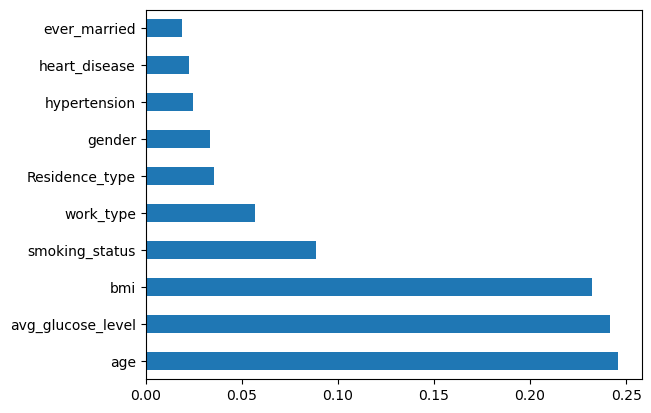

In [12]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
